In [33]:
import sys
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt    # for creating static, animated, and interactive visualizations
import seaborn as sns
from statsmodels import *
from IPython.display import Image
# data visualization library based on matplotlib
%matplotlib inline

In [24]:
path = 'Data/IRIS.csv'
iris_dataset = pd.read_csv(path)

### Exploratory Data Analysis - (EDA)

In [3]:
# Printing first 10 rows
iris_dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Getting the information about the dataset
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Statics of the dataset
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
# shows the count of each variable in given column
iris_dataset['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

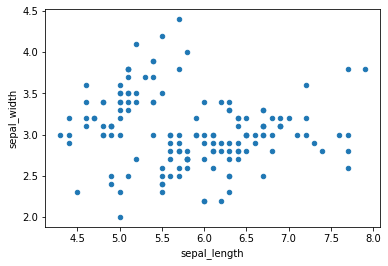

In [8]:
iris_dataset.plot(kind='scatter',x='sepal_length',y='sepal_width')     #plotting scatter plot

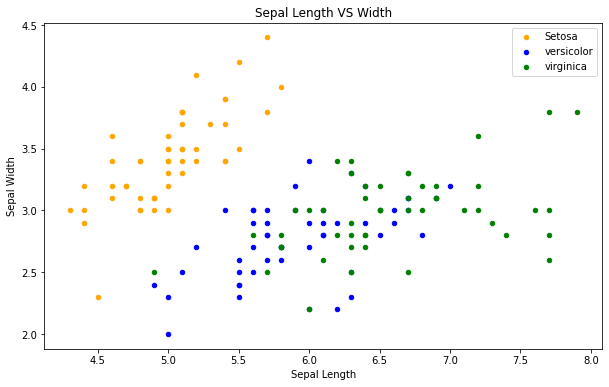

In [9]:
#plotting scatter plot with custom colours for each parameter using matplotlib
#sepal length vs sepal width


fig = iris_dataset[iris_dataset.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Setosa')
iris_dataset[iris_dataset.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='versicolor',ax=fig)
iris_dataset[iris_dataset.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

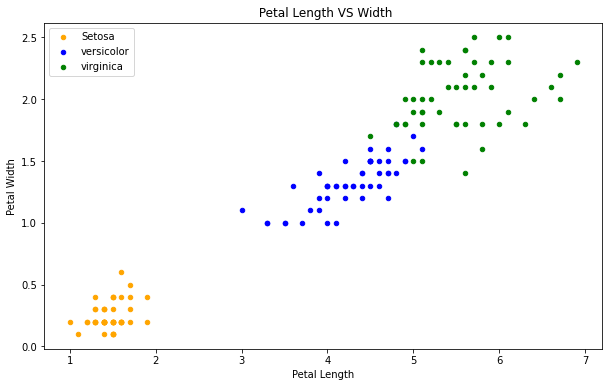

In [10]:
#plotting scatter plot with custom colours for each parameter using matplotlib
#petal length vs petal width


fig = iris_dataset[iris_dataset.species=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='Setosa')
iris_dataset[iris_dataset.species=='Iris-versicolor'].plot.scatter(x='petal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
iris_dataset[iris_dataset.species=='Iris-virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

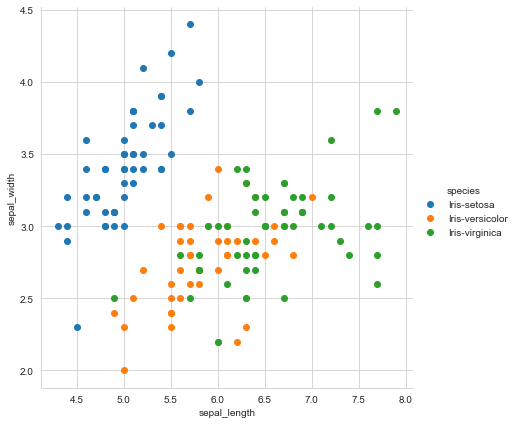

In [12]:
# printing the scatter plot using seaborn where hue='species' - Grouping variable that will produce points with 
#different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

sns.set_style("whitegrid")
sns.FacetGrid(iris_dataset, hue="species",height=6).map(plt.scatter,"sepal_length","sepal_width").add_legend();
plt.show()

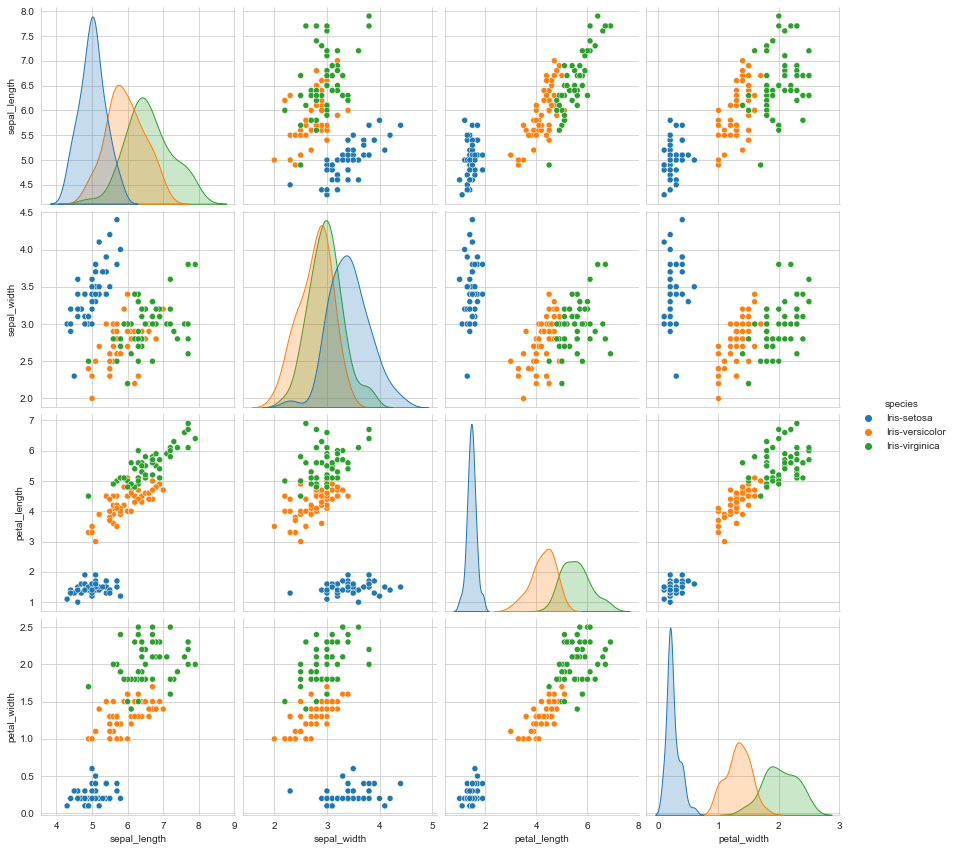

In [13]:
#plotting pair-plots to get better scatter plots of all possible parameters
#as we cannot plot 3d plots here, so we plot pair plots and make a meaning decision out of it

plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris_dataset, hue='species',height=3)
plt.show()

F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentia

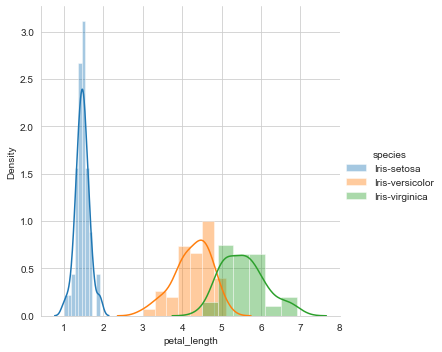

In [14]:
#the below plot shows the bar plot+area plot, this shows how seperated/merging with each other
#here we can observe that  iris setosa is well seperated from other two species. iris verscolor and iris virginica are 
#intersecting in a small area. this can be considered for further evaluation

sns.FacetGrid(iris_dataset, hue="species", height=5) \
    .map(sns.distplot, "petal_length") \
    .add_legend();
plt.show()

F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentia

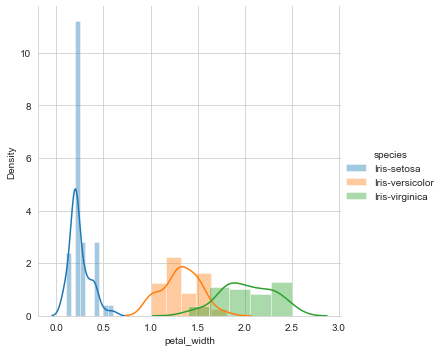

In [15]:
#the below plot shows the bar plot+area plot, this shows how seperated/merging with each other
#here we can observe that  all three are intersecting each other. No seperation is observed

sns.FacetGrid(iris_dataset, hue="species", height=5) \
    .map(sns.distplot, "petal_width") \
    .add_legend();
plt.show()

F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentia

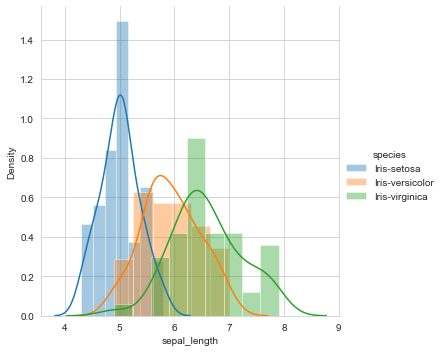

In [16]:
#the below plot shows the bar plot+area plot, this shows how seperated/merging with each other
#here we can observe that all the data are merging/intersecting with each other, this cannot be considered for evaluation
sns.FacetGrid(iris_dataset, hue="species", height=5) \
    .map(sns.distplot, "sepal_length") \
    .add_legend();
plt.show()

F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentials for AI - IT 5107\Practicles\MastersAI\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\EDU\Masters - Artificial Intelligence\YEAR 1\Semester 1\Part 1\Programming Essentia

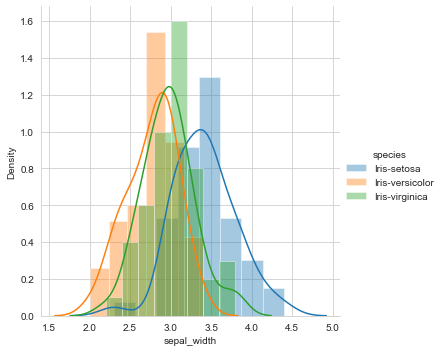

In [17]:
#the below plot shows the bar plot+area plot, this shows how seperated/merging with each other
#here we can observe that all the data are merging/intersecting with each other, this cannot be considered for evaluation

sns.FacetGrid(iris_dataset, hue="species", height=5) \
    .map(sns.distplot, "sepal_width") \
    .add_legend();
plt.show()

In [18]:
iris_setosa = iris_dataset[iris_dataset['species'] == "Iris-setosa"]
#can also be written as iris_setosa = iris.loc[iris['Species'] == "Iris-setosa"]
iris_versicolor = iris_dataset[iris_dataset['species'] == "Iris-versicolor"]
iris_virginica = iris_dataset[iris_dataset['species'] == "Iris-virginica"]

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


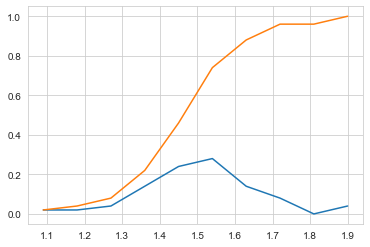

In [19]:
# Probability Density Function (PDF) vs Cumulative Distribution Function (CDF)
# The CDF is the probability that random variable values less than or equal to x whereas the PDF is a probability that a 
# random variable, say X, will take a value exactly equal to x.
# https://www.graduatetutor.com/wp-content/uploads/2021/03/Cumulative-Density-Function-of-a-dice-6.jpg

#plot CDF of petal length
counts, bin_edges= np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf = counts/ (sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

In [20]:
print("means: ")
print(np.mean(iris_setosa["petal_length"]))
#mean with an outlier
print("Mean with outlier is: ", np.mean(np.append(iris_setosa["petal_length"],50))) #there is massive change in mean if there is an outlier
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-Dev")
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

means: 
1.464
Mean with outlier is:  2.4156862745098038
5.5520000000000005
4.26

Std-Dev
0.17176728442867112
0.546347874526844
0.4651881339845203


In [26]:
#median, Quantiles, Percentiles, IQR

#printing median (with an outier), quantile, 90th percentile and median absolute deviation of each species 
#with parameter petal length

print("\nMedian:  ")        
print(np.median(iris_setosa["petal_length"]))  #median is better than mean in case of outleir and values are almost equal to mean
#median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50))) #if there is an outlier, median is uneffected
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\n\nQuantile: ") # quantile nothig but percentile at 0th, 25th, 50th(median) and 75th. (usualy its 25th, 50th, 75th, 100th)
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"],np.arange(0, 100, 25)))

# A percentile (or a centile) is a measure used in statistics indicating the value below which a given percentage of 
# observations in a group of observations fall. For example, the 20th percentile is the value (or score) below which 
# 20% of the observations may be found.
print("\n90th Percentile: ") #90th percentile tells how many flower length is less than 90th flower 
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"],90))

# In statistics, the median absolute deviation (MAD) is a robust measure of the variability of a univariate sample 
# of quantitative data. It can also refer to the population parameter that is estimated by the MAD calculated from a sample.
from statsmodels import robust
print("\nMedian absolute deviation:  ") #almost same as std dev
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


#IQR is the difference between 25th quantile and 75th quantile


Median:  
1.5
1.5
5.55
4.35


Quantile: 
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentile: 
1.7
6.3100000000000005
4.8

Median absolute deviation:  
0.14826022185056031
0.6671709983275211
0.5189107764769602


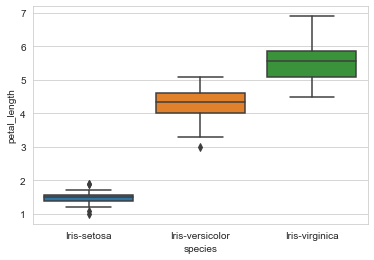

In [27]:
#box plot and whiskers

#https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

# A boxplot is a standardized way of displaying the distribution of data based on a 
# five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you 
# about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your 
# data is grouped, and if and how your data is skewed.
#whiskers - “maximum”: Q3 + 1.5*IQR and “minimum”: Q1 -1.5*IQR
#no standard way to draw whiskers
#diamond dots are outliers

sns.boxplot(x='species',y='petal_length', data=iris_dataset)
plt.show()

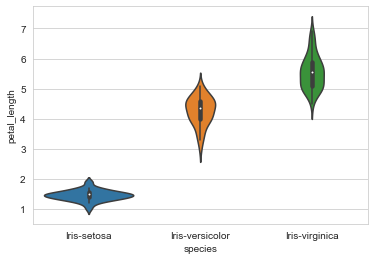

In [28]:
# The violinplot shows density of the length and width in the species. The thinner part denotes that there is 
# less density whereas the fatter part conveys higher density

sns.violinplot(x='species',y='petal_length', data=iris_dataset, size=8)
plt.show()


#white dot is median - 50th quantile
#black bar in middle is nothing but box plot

In [29]:
# univariate analysis - using only one variable eg petal length (box plots, violin plots, cdf, pdf)
# bivariate analysis - using two variables (pair plots, scatter plots)
# multivariate analysis - more than two variables - (3d scatter plot in 3d space)

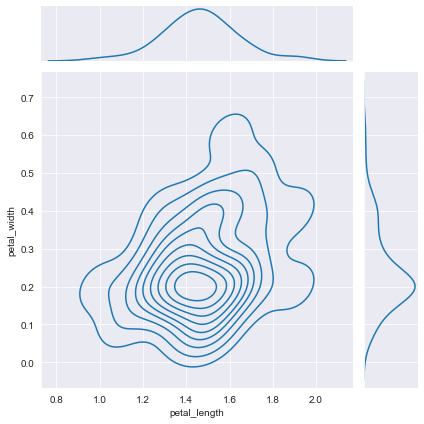

In [30]:
#multivariate probability density, countour plot
sns.set_style(style="darkgrid")
sns.jointplot(x='petal_length', y='petal_width', data=iris_setosa, kind="kde")
plt.show()

### Classify Flowers Using SLP (Single Layer Perceptron)

> #### Implementation (Perceptron [Input -> Output])
>> * Input Values$\\(1,x_{1},x_{2},.....,x_{n})$

>> * Respective weights $\\(w_{0},w_{1},w_{2},.....,w_{n})$

>> * Weighted Sum (Inside the Neuron)$\\(1w_{0}+x_{1}w_{1}+x_{2}w_{2}+.....+x_{n}w_{n})$

>> * We use ReLu function as activation function (Step Function)$\\Relu(z) = \begin{cases} z & x \ge 0 \\ 0 & x < 0 \end{cases}$ 

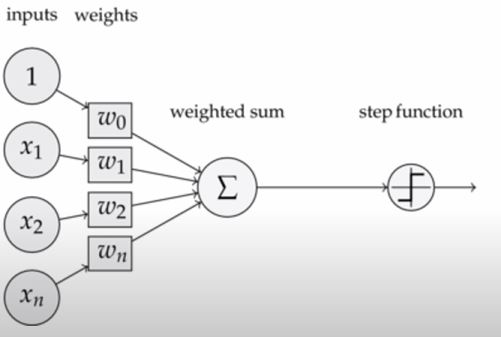

In [36]:
Image('Images\SLP.JPG')

#### Training Process
>> 1. Initialize the weights to 0 0r a small random value.
>> 2. For each example _j_ in our training set _D_, perform the following steps over the input $x_{j}$ and the desired output $d_{j}$
>>> * Calculate the output $\\y_{j} = f[w(t).x_{j}]  = f[w_{0}(t)x_{j,0}+w_{1}(t)x_{j,1}+w_{2}(t)x_{j,2}+.....+w_{n}(t)x_{j,n}]$
>>> * Update the weights $\\w_{i}(t+1) = w_{i}(t)+(d_{j}-y_{j(t)})x_{j,i}$for all features $ 0 \le i \le n$

In [64]:
from numpy import exp, array, random, dot, tanh

class Single_Layer_Perceptron_network():
    
    def __init__(self):
        random.seed(1)
        # 3x1 Weight matrix
        self.weight_matrix = 2 * random.random((3, 1)) - 1
        
    def my_tanh(self, x):
        return tanh(x)
    
    def my_tanh_derivative(self, x):
        return 1.0 - tanh(x) ** 2
    
    # forward propagation
    def my_forward_propagation(self, inputs):
        return self.my_tanh(dot(inputs, self.weight_matrix))
    
    # training the neural network.
    def train(self, train_inputs, train_outputs,num_train_iterations):
        for iteration in range(num_train_iterations):
            output = self.my_forward_propagation(train_inputs)
            # Calculate the error in the output.
            # Backward Propagation
            error = train_outputs - output
            adjustment = dot(train_inputs.T, error *self.my_tanh_derivative(output))
            # Adjust the weight matrix
            self.weight_matrix += adjustment

# Driver Code
if __name__ == "__main__":
    my_neural = Single_Layer_Perceptron_network()
    print ('Random weights when training has started')
    print (my_neural.weight_matrix)
    train_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    train_outputs = array([[0, 1, 1, 0]]).T
    my_neural.train(train_inputs, train_outputs, 10000)
    print ('Displaying new weights after training')
    print (my_neural.weight_matrix)
        
    # Test the neural network with a new situation.
    print ("Testing network on new examples ->")
    print (my_neural.my_forward_propagation(array([1, 0,0])))

Random weights when training has started
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Displaying new weights after training
[[5.39428067]
 [0.19482422]
 [0.34317086]]
Testing network on new examples ->
[0.99995873]
